In [3]:
from my_methods import *
from scipy import stats
#os.mkdir('img')

In [4]:
Eint_mul = json_load('1-PCC_Values/ExE_interactions_mul.json')
Nint_mul = json_load('1-PCC_Values/NxN_interactions_mul.json')
GLOBALint_mul = json_load('1-PCC_Values/global_interaction_mul.json')

In [6]:
Eint_add = json_load('1-PCC_Values/ExE_interactions_add.json')
Nint_add = json_load('1-PCC_Values/NxN_interactions_add.json')
GLOBALint_add = json_load('1-PCC_Values/global_interaction_add.json')

In [7]:
networks_mul = [Eint_mul, Nint_mul, GLOBALint_mul]
networks_add = [Eint_add, Nint_add, GLOBALint_add]

In [8]:
def std(net):
    #net = reduce_dictionary(net)
    values = []
    for k in net.keys():
        values.extend(list(net[k].values()))
    std = np.std(values)
    return std

In [9]:
2*std(GLOBALint_mul)

0.0909476561213351

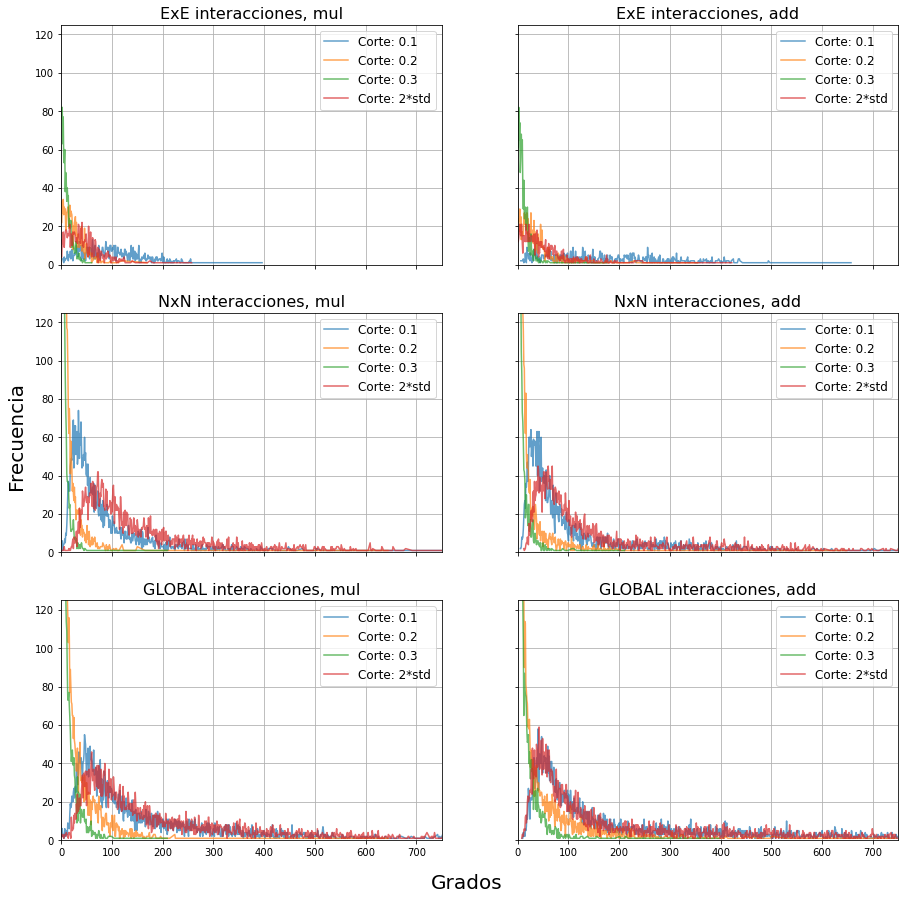

In [22]:
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(15,15))
titles = ['ExE', 'NxN', 'GLOBAL']

for f in range(len(ax)):
    for c in range(len(ax[f])):
        if c%2==0:
            ax[f][c].plot(*degree_freq(select_interactions(networks_mul[f], 0.1)), label='Cutoff: 0.1', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_mul[f], 0.2)), label='Cutoff: 0.2', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_mul[f], 0.3)), label='Cutoff: 0.3', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_mul[f], 2*std(networks_mul[f]))), label='Cutoff: 2*std', alpha=0.7)
            
            ax[f][c].set_title(titles[f]+' interactions, mul', fontsize=16)
            ax[f][c].set_ylim(0,125)
            ax[f][c].set_xlim(0,750)
            ax[f][c].grid(True)
            ax[f][c].legend(fontsize=12)
        else:
            ax[f][c].plot(*degree_freq(select_interactions(networks_add[f], 0.1)), label='Cutoff: 0.1', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_add[f], 0.2)), label='Cutoff: 0.2', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_add[f], 0.3)), label='Cutoff: 0.3', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_add[f], 2*std(networks_add[f]))), label='Cutoff: 2*std', alpha=0.7)
            
            ax[f][c].set_title(titles[f]+' interactions, add', fontsize=16)
            ax[f][c].set_ylim(0,125)
            ax[f][c].set_xlim(0,750)
            ax[f][c].grid(True)
            ax[f][c].legend(fontsize=12)
fig.text(0.5, 0.08, 'Degree', ha="center", fontsize=20)
fig.text(0.075, 0.5, 'Frequency', va="center", fontsize=20, rotation='vertical')
fig.savefig('img/cutoffs.png')

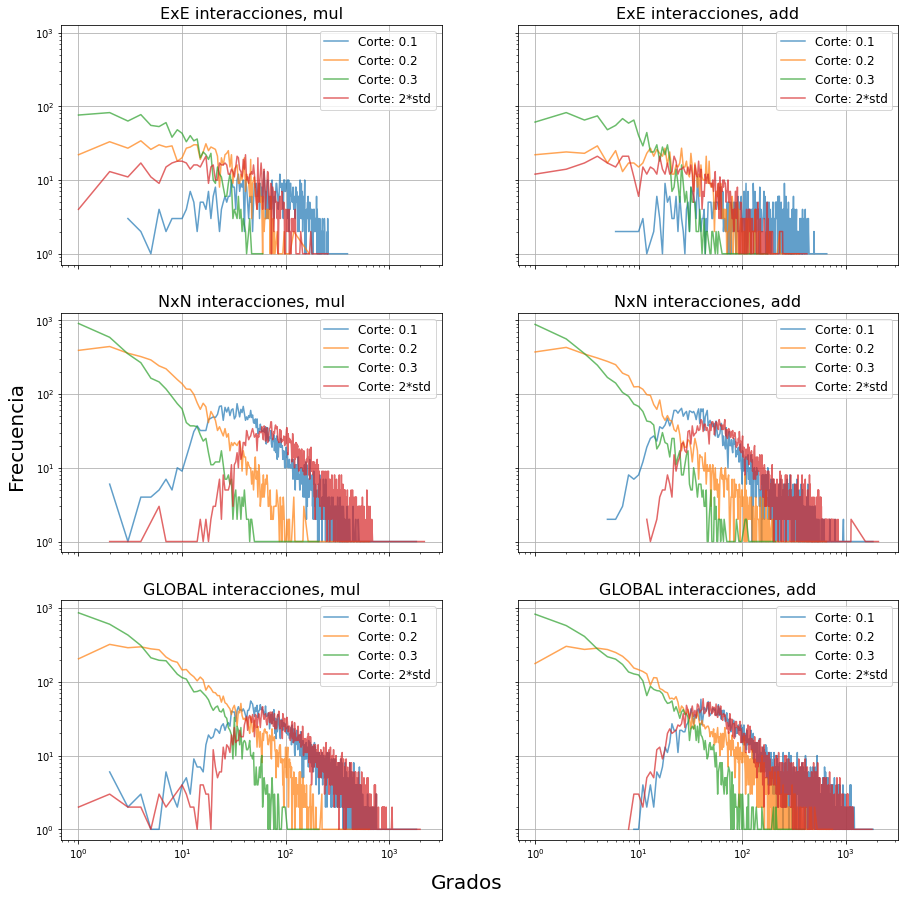

In [26]:
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(15,15))
titles = ['ExE', 'NxN', 'GLOBAL']

for f in range(len(ax)):
    for c in range(len(ax[f])):
        if c%2==0:
            ax[f][c].plot(*degree_freq(select_interactions(networks_mul[f], 0.1)), label='Cutoff: 0.1', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_mul[f], 0.2)), label='Cutoff: 0.2', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_mul[f], 0.3)), label='Cutoff: 0.3', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_mul[f], 2*std(networks_mul[f]))), label='Cutoff: 2*std', alpha=0.7)
            
            ax[f][c].set_title(titles[f]+' interactions, mul', fontsize=16)
            #ax[f][c].set_ylim(0,125)
            #ax[f][c].set_xlim(0,750)
            ax[f][c].grid(True)
            ax[f][c].legend(fontsize=12)
            ax[f][c].set_xscale('log')
            ax[f][c].set_yscale('log')
        else:
            ax[f][c].plot(*degree_freq(select_interactions(networks_add[f], 0.1)), label='Cutoff: 0.1', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_add[f], 0.2)), label='Cutoff: 0.2', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_add[f], 0.3)), label='Cutoff: 0.3', alpha=0.7)
            ax[f][c].plot(*degree_freq(select_interactions(networks_add[f], 2*std(networks_add[f]))), label='Cutoff: 2*std', alpha=0.7)
            
            ax[f][c].set_title(titles[f]+' interactions, add', fontsize=16)
            #ax[f][c].set_ylim(0,125)
            #ax[f][c].set_xlim(0,750)
            ax[f][c].grid(True)
            ax[f][c].set_xscale('log')
            ax[f][c].set_yscale('log')
            ax[f][c].legend(fontsize=12)
fig.text(0.5, 0.08, 'Degree', ha="center", fontsize=20)
fig.text(0.075, 0.5, 'Frequency', va="center", fontsize=20, rotation='vertical')
fig.savefig('img/cutoffs_log.png')

In [10]:
params_03 = {
    'E_mul':[],
    'N_mul':[],
    'G_mul':[],
    'E_add':[],
    'N_add':[],
    'G_add':[]
}

Text(0.075, 0.5, 'log(Frecuencia)')

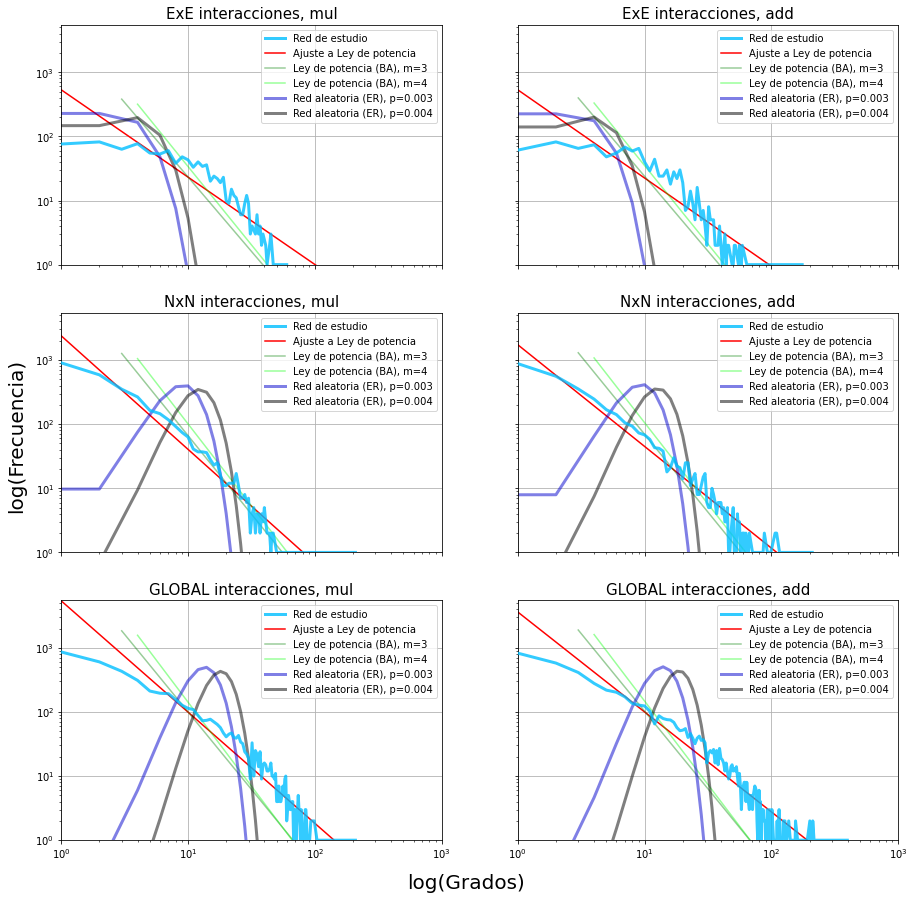

In [11]:
fig, ax = plt.subplots(3,2, figsize=(15,15), sharex=True, sharey=True)

def func(x, i, m):
    return np.exp(i) * x**(m)               ##########################################################################################################################


filt_value = 0.3
# 0.3 sirve perfecto, 0.2 sirve pero en ExE no aparece mucha Frequency para bajos Degree, 0.1 ya sale como random con dist Poisson 
for i in range(len(ax)):
    for j in range(len(ax[i])):
        titles = ['ExE', 'NxN', 'GLOBAL']
        if j%2==0:
            
            x_range = np.arange(0,50,2).reshape(-1,1)
            
            
            net_mul = select_interactions(networks_mul[i], filt_value)
            degree, freq = degree_freq(net_mul)
            ax[i][j].plot(degree, freq, alpha=0.8, c='deepskyblue', linewidth=3, zorder=5, label='Network in study')
            ########################################################## Best Fit
            x = np.log(degree)
            y = np.log(freq)
                                   
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            ax[i][j].plot(np.exp(x_range), np.exp(slope*x_range+intercept), c='r', label='Fit to Power Law')
            
            if i==0:
                params_03['E_mul']=[slope, intercept, r_value, r_value**2, p_value]
            if i==1:
                params_03['N_mul']=[slope, intercept, r_value, r_value**2, p_value]
            if i==2:
                params_03['G_mul']=[slope, intercept, r_value, r_value**2, p_value]
                
                
            ########################################################## Barabasi Albert
            BA1_d, BA1_f = degree_freq(generate_power_law(len(net_mul), 3))
            BA1_popt, _ = curve_fit(func, BA1_d, BA1_f)
            ax[i][j].plot(BA1_d, func(BA1_d, *BA1_popt), alpha=0.4, c='green', label='Power Law (BA), m=3')
            
            BA2_d, BA2_f = degree_freq(generate_power_law(len(net_mul), 4))
            BA2_popt, _ = curve_fit(func, BA2_d, BA2_f)
            ax[i][j].plot(BA2_d, func(BA2_d, *BA2_popt), alpha=0.4, c='lime', label='Power Law (BA), m=4')
            ########################################################## Erdos Renyi
            #x_range = np.arange(0,50,0.1)
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_mul), 0.003))) , alpha=0.5, linewidth=3, c='mediumblue', label='Random Network (ER), p=0.003')
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_mul), 0.004))) , alpha=0.5, linewidth=3, c='k', label='Random Network (ER), p=0.004')
            #########################################################
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(1, 10e2)
            ax[i][j].set_ylim(1, 55e2)
            ax[i][j].grid(True)
            ax[i][j].set_title(titles[i]+' interactions, mul', fontsize=15)
            ax[i][j].legend()
        else:
            x_range = np.arange(0,50,2)
            
            net_add = select_interactions(networks_add[i], filt_value)
            degree, freq = degree_freq(net_add)
            ax[i][j].plot(degree, freq, alpha=0.8, c='deepskyblue', linewidth=3, zorder=5, label='Network in study')
            ########################################################## Best Fit
            
            x = np.log(degree)
            y = np.log(freq)
            
            #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=55)
            #
            #lin = LinearRegression().fit(x_train, y_train)
            
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            
            ax[i][j].plot(np.exp(x_range), np.exp(slope*x_range+intercept), c='r', label='Fit to Power Law')
            
            if i==0:
                params_03['E_add']=[slope, intercept, r_value, r_value**2, p_value]
            if i==1:
                params_03['N_add']=[slope, intercept, r_value, r_value**2, p_value]
            if i==2:
                params_03['G_add']=[slope, intercept, r_value, r_value**2, p_value]
            
            
            
            
            
            ########################################################## Barabasi Albert
            BA1_d, BA1_f = degree_freq(generate_power_law(len(net_add), 3))
            BA1_popt, _ = curve_fit(func, BA1_d, BA1_f)
            ax[i][j].plot(BA1_d, func(BA1_d, *BA1_popt), alpha=0.4, c='green', label='Power Law (BA), m=3')
            
            BA2_d, BA2_f = degree_freq(generate_power_law(len(net_add), 4))
            BA2_popt, _ = curve_fit(func, BA2_d, BA2_f)
            ax[i][j].plot(BA2_d, func(BA2_d, *BA2_popt), alpha=0.4, c='lime', label='Power Law (BA), m=4')
            ########################################################## Erdos Renyi
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_add), 0.003))) , alpha=0.5, linewidth=3, c='mediumblue', label='Random Network (ER), p=0.003')
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_add), 0.004))) , alpha=0.5, linewidth=3, c='k', label='Random Network (ER), p=0.004')
            #########################################################
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(1, 10e2)
            ax[i][j].set_ylim(1, 55e2)
            ax[i][j].grid(True)
            ax[i][j].set_title(titles[i]+' interactions, add', fontsize=15)
            ax[i][j].legend()
fig.text(0.5, 0.08, 'log(Degree)', ha="center", fontsize=20)
fig.text(0.075, 0.5, 'log(Frequency)', va="center", fontsize=20, rotation='vertical')

#fig.savefig('img/powerlaw_log.png')

In [16]:
df = {}
df['Network'] = list(params_03.keys())
df['Beta'] = [params_03[k][0] for k in params_03.keys()]
df['pearson r'] = [params_03[k][2] for k in params_03.keys()]
df['R2'] = [params_03[k][3] for k in params_03.keys()]
df['p-value'] = [params_03[k][4] for k in params_03.keys()]
df = pd.DataFrame(df)
df.to_csv('params_03.csv')
df

,Red,Beta,r de pearson,R2,p-valor
0,E_mul,-1.362064,-0.887728,0.788061,9.160500e-17
1,N_mul,-1.770775,-0.961715,0.924896,1.816080e-31
2,G_mul,-1.734759,-0.948560,0.899766,3.038500e-49
3,E_add,-1.375734,-0.906198,0.821194,1.002748e-23
4,N_add,-1.586162,-0.954576,0.911215,2.074729e-45
5,G_add,-1.559071,-0.952098,0.906491,6.936368e-73


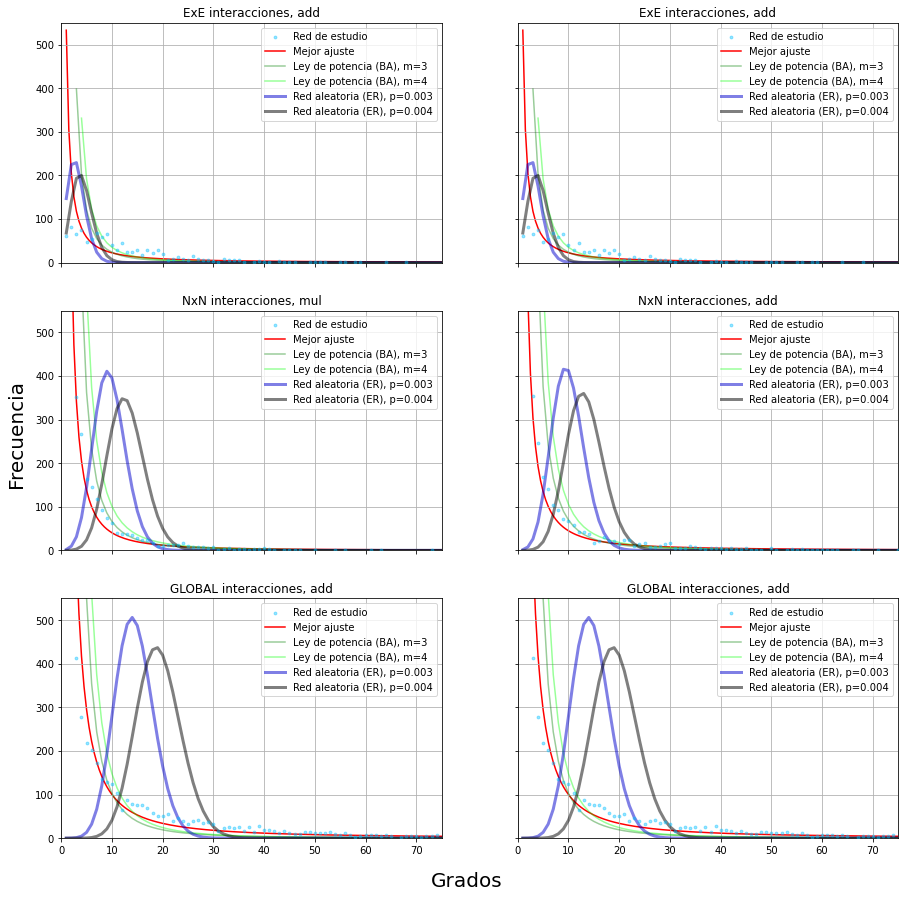

In [17]:
fig, ax = plt.subplots(3,2, figsize=(15,15), sharex=True, sharey=True)
filt_value = 0.3
######## Si se filtra NxN con extreme_interactions 2.5 los puntos de corte son en -0.08 y 0.06
filt_value = 0.3    # 0.3 sirve perfecto, 0.2 sirve pero en ExE no aparece mucha Frequency para bajos Degree, 0.1 ya sale como random con dist Poisson 
for i in range(len(ax)):
    for j in range(len(ax[i])):
        titles = ['ExE', 'NxN', 'GLOBAL']
        if j%2==0 and i==1:
            net_mul = select_interactions(networks_mul[i], filt_value)
            degree, freq = degree_freq(net_mul)
            ax[i][j].scatter(degree, freq, s=8, alpha=0.4, c='deepskyblue', zorder=5, label='Network in study')
            
            if i==0:
                slope = float(params_03['E_mul'][0])
                interc = float(params_03['E_mul'][1])
            if i==1:
                slope = float(params_03['N_mul'][0])
                interc = float(params_03['N_mul'][1])
            if i==2:
                slope = float(params_03['G_mul'][0])
                interc = float(params_03['G_mul'][1])
            
            x_range = np.arange(degree.min(), degree.max(), 0.5).reshape(-1,1)
            ax[i][j].plot(x_range, func(x_range, interc, slope), 'r-', zorder=-5, label='Best Fit')
            
            
            
            ########################################################## Barabasi Albert
            BA1_d, BA1_f = degree_freq(generate_power_law(len(net_mul), 3))
            BA1_popt, _ = curve_fit(func, BA1_d, BA1_f)
            ax[i][j].plot(BA1_d, func(BA1_d, *BA1_popt), alpha=0.4, c='green', label='Power Law (BA), m=3')
            
            BA2_d, BA2_f = degree_freq(generate_power_law(len(net_mul), 4))
            BA2_popt, _ = curve_fit(func, BA2_d, BA2_f)
            ax[i][j].plot(BA2_d, func(BA2_d, *BA2_popt), alpha=0.4, c='lime', label='Power Law (BA), m=4')
            ########################################################## Erdos Renyi
            x_range = np.arange(degree.min(), degree.max(), 1).reshape(-1,1)
                        
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_mul), 0.003))) , alpha=0.5, linewidth=3, c='mediumblue', label='Random Network (ER), p=0.003')
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_mul), 0.004))) , alpha=0.5, linewidth=3, c='k', label='Random Network (ER), p=0.004')
            #########################################################
            
            ##########################################################
            
            ax[i][j].grid(True)
            ax[i][j].set_title(titles[i]+' interactions, mul')
            ax[i][j].legend()
            ax[i][j].set_xlim(0, 75)
            ax[i][j].set_ylim(0, 550)
        else:
            net_add = select_interactions(networks_add[i], filt_value)
            degree, freq = degree_freq(net_add)
            ax[i][j].scatter(degree, freq, s=8, alpha=0.4, c='deepskyblue', zorder=5, label='Network in study')
            
            if i==0:
                slope = float(params_03['E_add'][0])
                interc = float(params_03['E_add'][1])
            if i==1:
                slope = float(params_03['N_add'][0])
                interc = float(params_03['N_add'][1])
            if i==2:
                slope = float(params_03['G_add'][0])
                interc = float(params_03['G_add'][1])
            
            x_range = np.arange(degree.min(), degree.max(), 0.5).reshape(-1,1)
            ax[i][j].plot(x_range, func(x_range, interc, slope), 'r-', zorder=-5, label='Best Fit')
            
            
            
            ########################################################## Barabasi Albert
            BA1_d, BA1_f = degree_freq(generate_power_law(len(net_add), 3))
            BA1_popt, _ = curve_fit(func, BA1_d, BA1_f)
            ax[i][j].plot(BA1_d, func(BA1_d, *BA1_popt), alpha=0.4, c='green', label='Power Law (BA), m=3')
            
            BA2_d, BA2_f = degree_freq(generate_power_law(len(net_add), 4))
            BA2_popt, _ = curve_fit(func, BA2_d, BA2_f)
            ax[i][j].plot(BA2_d, func(BA2_d, *BA2_popt), alpha=0.4, c='lime', label='Power Law (BA), m=4')
            ########################################################## Erdos Renyi
            x_range = np.arange(degree.min(), degree.max(), 1).reshape(-1,1)
                        
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_add), 0.003))) , alpha=0.5, linewidth=3, c='mediumblue', label='Random Network (ER), p=0.003')
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_add), 0.004))) , alpha=0.5, linewidth=3, c='k', label='Random Network (ER), p=0.004')
            #########################################################
            
            ##########################################################
            
            ax[i][j].grid(True)
            ax[i][j].set_title(titles[i]+' interactions, add')
            ax[i][j].legend()
            ax[i][j].set_xlim(0, 75)
            ax[i][j].set_ylim(0, 550)
fig.text(0.5, 0.08, 'Degree', ha="center", fontsize=20)
fig.text(0.075, 0.5, 'Frequency', va="center", fontsize=20, rotation='vertical')
fig.savefig('img/powerlaw.png')

### Voy a probar como sale la distribucion con 0.2

In [18]:
params_02 = {
    'E_mul':[],
    'N_mul':[],
    'G_mul':[],
    'E_add':[],
    'N_add':[],
    'G_add':[]
}

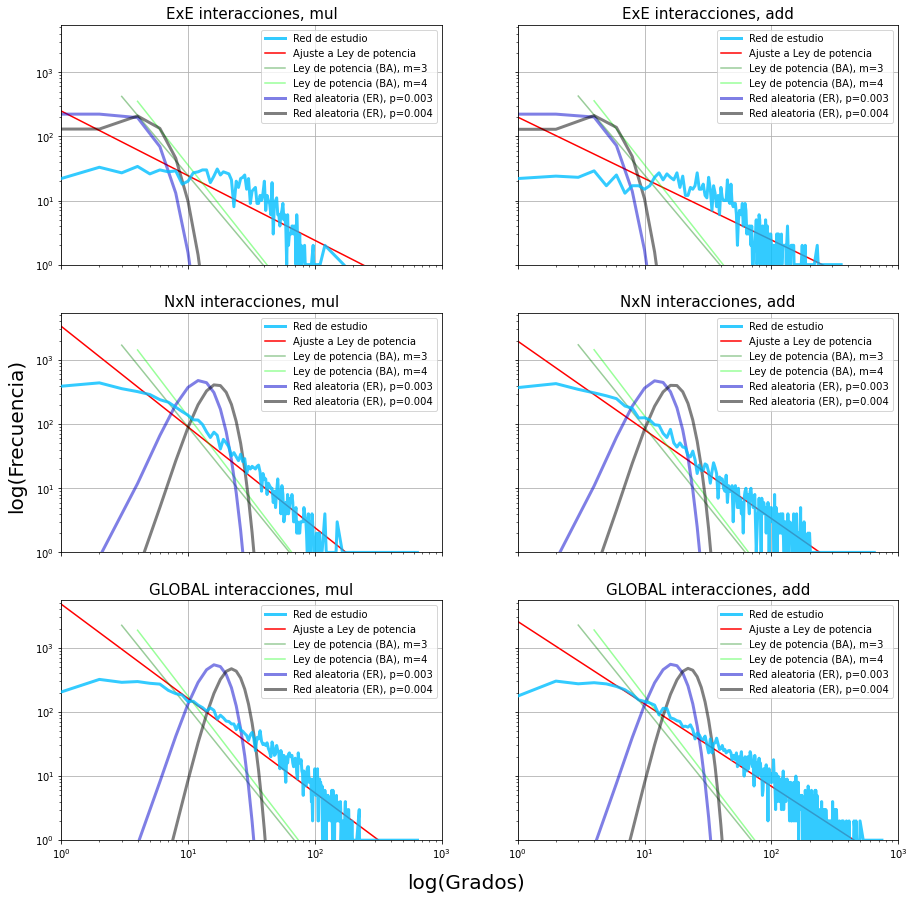

In [19]:
fig, ax = plt.subplots(3,2, figsize=(15,15), sharex=True, sharey=True)

def func(x, i, m):
    return np.exp(i) * x**(m)               ##########################################################################################################################


filt_value = 0.2
# 0.3 sirve perfecto, 0.2 sirve pero en ExE no aparece mucha Frequency para bajos Degree, 0.1 ya sale como random con dist Poisson 
for i in range(len(ax)):
    for j in range(len(ax[i])):
        titles = ['ExE', 'NxN', 'GLOBAL']
        if j%2==0:
            
            x_range = np.arange(0,50,2).reshape(-1,1)
            
            
            net_mul = select_interactions(networks_mul[i], filt_value)
            degree, freq = degree_freq(net_mul)
            ax[i][j].plot(degree, freq, alpha=0.8, c='deepskyblue', linewidth=3, zorder=5, label='Network in study')
            ########################################################## Best Fit
            x = np.log(degree)
            y = np.log(freq)
                                   
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            ax[i][j].plot(np.exp(x_range), np.exp(slope*x_range+intercept), c='r', label='Power Law Fit')
            
            if i==0:
                params_02['E_mul']=[slope, intercept, r_value, r_value**2, p_value]
            if i==1:
                params_02['N_mul']=[slope, intercept, r_value, r_value**2, p_value]
            if i==2:
                params_02['G_mul']=[slope, intercept, r_value, r_value**2, p_value]         
                
            ########################################################## Barabasi Albert
            BA1_d, BA1_f = degree_freq(generate_power_law(len(net_mul), 3))
            BA1_popt, _ = curve_fit(func, BA1_d, BA1_f)
            ax[i][j].plot(BA1_d, func(BA1_d, *BA1_popt), alpha=0.4, c='green', label='Power Law (BA), m=3')
            
            BA2_d, BA2_f = degree_freq(generate_power_law(len(net_mul), 4))
            BA2_popt, _ = curve_fit(func, BA2_d, BA2_f)
            ax[i][j].plot(BA2_d, func(BA2_d, *BA2_popt), alpha=0.4, c='lime', label='Power Law (BA), m=4')
            ########################################################## Erdos Renyi
            #x_range = np.arange(0,50,0.1)
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_mul), 0.003))) , alpha=0.5, linewidth=3, c='mediumblue', label='Random Network (ER), p=0.003')
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_mul), 0.004))) , alpha=0.5, linewidth=3, c='k', label='Random Network (ER), p=0.004')
            #########################################################
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(1, 10e2)
            ax[i][j].set_ylim(1, 55e2)
            ax[i][j].grid(True)
            ax[i][j].set_title(titles[i]+' interactions, mul', fontsize=15)
            ax[i][j].legend()
        else:
            x_range = np.arange(0,50,2).reshape(-1,1)
            
            net_add = select_interactions(networks_add[i], filt_value)
            degree, freq = degree_freq(net_add)
            ax[i][j].plot(degree, freq, alpha=0.8, c='deepskyblue', linewidth=3, zorder=5, label='Network in study')
            ########################################################## Best Fit
            x = np.log(degree)
            y = np.log(freq)
                                   
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            ax[i][j].plot(np.exp(x_range), np.exp(slope*x_range+intercept), c='r', label='Power Law Fit')
            
            if i==0:
                params_02['E_add']=[slope, intercept, r_value, r_value**2, p_value]
            if i==1:
                params_02['N_add']=[slope, intercept, r_value, r_value**2, p_value]
            if i==2:
                params_02['G_add']=[slope, intercept, r_value, r_value**2, p_value]
            
            ########################################################## Barabasi Albert
            BA1_d, BA1_f = degree_freq(generate_power_law(len(net_add), 3))
            BA1_popt, _ = curve_fit(func, BA1_d, BA1_f)
            ax[i][j].plot(BA1_d, func(BA1_d, *BA1_popt), alpha=0.4, c='green', label='Power Law (BA), m=3')
            
            BA2_d, BA2_f = degree_freq(generate_power_law(len(net_add), 4))
            BA2_popt, _ = curve_fit(func, BA2_d, BA2_f)
            ax[i][j].plot(BA2_d, func(BA2_d, *BA2_popt), alpha=0.4, c='lime', label='Power Law (BA), m=4')
            ########################################################## Erdos Renyi
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_add), 0.003))) , alpha=0.5, linewidth=3, c='mediumblue', label='Random Network (ER), p=0.003')
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_add), 0.004))) , alpha=0.5, linewidth=3, c='k', label='Random Network (ER), p=0.004')
            #########################################################
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(1, 10e2)
            ax[i][j].set_ylim(1, 55e2)
            ax[i][j].grid(True)
            ax[i][j].set_title(titles[i]+' interactions, add', fontsize=15)
            ax[i][j].legend()
fig.text(0.5, 0.08, 'log(Degree)', ha="center", fontsize=20)
fig.text(0.075, 0.5, 'log(Frequency)', va="center", fontsize=20, rotation='vertical')

fig.savefig('img/powerlaw_log_0.2.png')

In [27]:
df = {}
df['Network'] = list(params_02.keys())
df['Beta'] = [params_02[k][0] for k in params_02.keys()]
df['pearson r'] = [params_02[k][2] for k in params_02.keys()]
df['R2'] = [params_02[k][3] for k in params_02.keys()]
df['p-value'] = [params_02[k][4] for k in params_02.keys()]
df = pd.DataFrame(df)
df.to_csv('params_02.csv')
df

,Red,Beta,r de pearson,R2,p-valor
0,E_mul,-1.008365,-0.802225,0.643566,2.529900e-22
1,N_mul,-1.570043,-0.948236,0.899152,4.020375e-61
2,G_mul,-1.470720,-0.929955,0.864817,1.823050e-91
3,E_add,-0.958040,-0.842889,0.710463,5.039559e-43
4,N_add,-1.383070,-0.947432,0.897628,2.053414e-103
5,G_add,-1.285505,-0.938547,0.880870,1.876838e-161


### Voy a probar ahora la distribución con 0.1

In [28]:
params_01 = {
    'E_mul':[],
    'N_mul':[],
    'G_mul':[],
    'E_add':[],
    'N_add':[],
    'G_add':[]
}

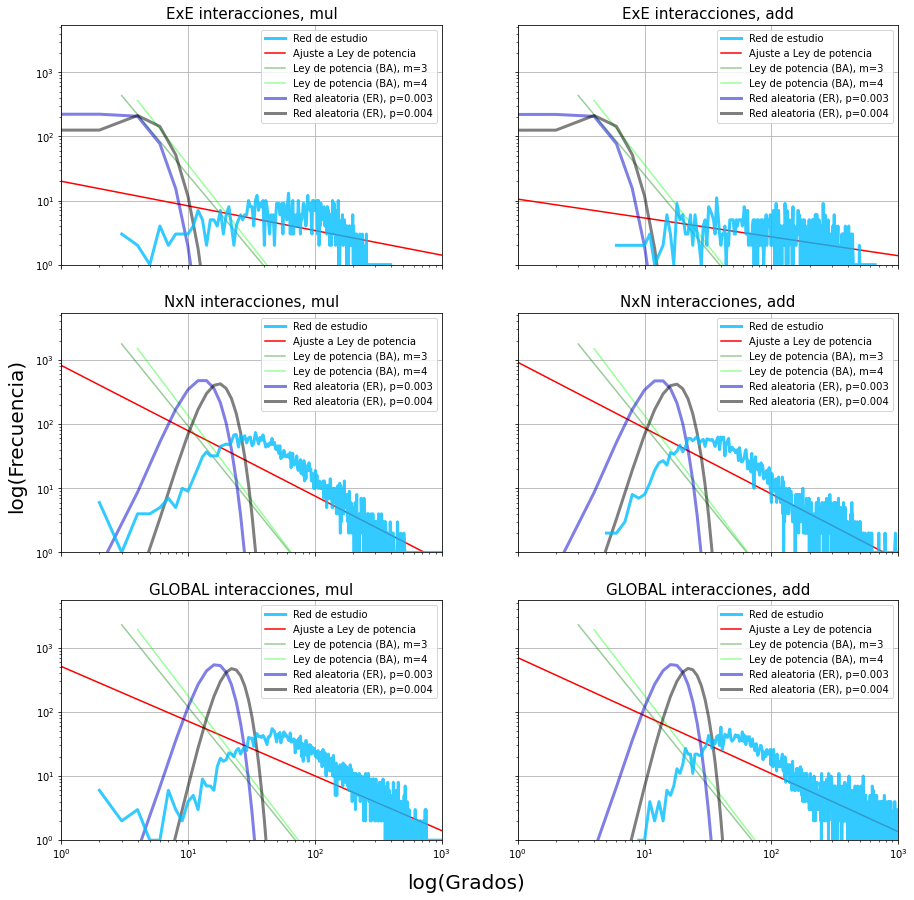

In [29]:
fig, ax = plt.subplots(3,2, figsize=(15,15), sharex=True, sharey=True)

def func(x, i, m):
    return np.exp(i) * x**(m)               ##########################################################################################################################


filt_value = 0.1
# 0.3 sirve perfecto, 0.2 sirve pero en ExE no aparece mucha Frequency para bajos Degree, 0.1 ya sale como random con dist Poisson 
for i in range(len(ax)):
    for j in range(len(ax[i])):
        titles = ['ExE', 'NxN', 'GLOBAL']
        if j%2==0:
            
            x_range = np.arange(0,50,2).reshape(-1,1)
            
            
            net_mul = select_interactions(networks_mul[i], filt_value)
            degree, freq = degree_freq(net_mul)
            ax[i][j].plot(degree, freq, alpha=0.8, c='deepskyblue', linewidth=3, zorder=5, label='Network in study')
            ########################################################## Best Fit
            x = np.log(degree)
            y = np.log(freq)
                                   
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            ax[i][j].plot(np.exp(x_range), np.exp(slope*x_range+intercept), c='r', label='Power Law Fit')
            
            if i==0:
                params_01['E_mul']=[slope, intercept, r_value, r_value**2, p_value]
            if i==1:
                params_01['N_mul']=[slope, intercept, r_value, r_value**2, p_value]
            if i==2:
                params_01['G_mul']=[slope, intercept, r_value, r_value**2, p_value]
            ########################################################## Barabasi Albert
            BA1_d, BA1_f = degree_freq(generate_power_law(len(net_mul), 3))
            BA1_popt, _ = curve_fit(func, BA1_d, BA1_f)
            ax[i][j].plot(BA1_d, func(BA1_d, *BA1_popt), alpha=0.4, c='green', label='Power Law (BA), m=3')
            
            BA2_d, BA2_f = degree_freq(generate_power_law(len(net_mul), 4))
            BA2_popt, _ = curve_fit(func, BA2_d, BA2_f)
            ax[i][j].plot(BA2_d, func(BA2_d, *BA2_popt), alpha=0.4, c='lime', label='Power Law (BA), m=4')
            ########################################################## Erdos Renyi
            #x_range = np.arange(0,50,0.1)
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_mul), 0.003))) , alpha=0.5, linewidth=3, c='mediumblue', label='Random Network (ER), p=0.003')
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_mul), 0.004))) , alpha=0.5, linewidth=3, c='k', label='Random Network (ER), p=0.004')
            #########################################################
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(1, 10e2)
            ax[i][j].set_ylim(1, 55e2)
            ax[i][j].grid(True)
            ax[i][j].set_title(titles[i]+' interactions, mul', fontsize=15)
            ax[i][j].legend()
        else:
            x_range = np.arange(0,50,2).reshape(-1,1)
            
            net_add = select_interactions(networks_add[i], filt_value)
            degree, freq = degree_freq(net_add)
            ax[i][j].plot(degree, freq, alpha=0.8, c='deepskyblue', linewidth=3, zorder=5, label='Network in study')
            ########################################################## Best Fit
            
            x = np.log(degree)
            y = np.log(freq)
                                   
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            ax[i][j].plot(np.exp(x_range), np.exp(slope*x_range+intercept), c='r', label='Power Law Fit')
            
            if i==0:
                params_01['E_add']=[slope, intercept, r_value, r_value**2, p_value]
            if i==1:
                params_01['N_add']=[slope, intercept, r_value, r_value**2, p_value]
            if i==2:
                params_01['G_add']=[slope, intercept, r_value, r_value**2, p_value]
            
            ########################################################## Barabasi Albert
            BA1_d, BA1_f = degree_freq(generate_power_law(len(net_add), 3))
            BA1_popt, _ = curve_fit(func, BA1_d, BA1_f)
            ax[i][j].plot(BA1_d, func(BA1_d, *BA1_popt), alpha=0.4, c='green', label='Power Law (BA), m=3')
            
            BA2_d, BA2_f = degree_freq(generate_power_law(len(net_add), 4))
            BA2_popt, _ = curve_fit(func, BA2_d, BA2_f)
            ax[i][j].plot(BA2_d, func(BA2_d, *BA2_popt), alpha=0.4, c='lime', label='Power Law (BA), m=4')
            ########################################################## Erdos Renyi
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_add), 0.003))) , alpha=0.5, linewidth=3, c='mediumblue', label='Random Network (ER), p=0.003')
            ax[i][j].plot(x_range, fit_poisson(x_range, *degree_freq(generate_random(len(net_add), 0.004))) , alpha=0.5, linewidth=3, c='k', label='Random Network (ER), p=0.004')
            #########################################################
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(1, 10e2)
            ax[i][j].set_ylim(1, 55e2)
            ax[i][j].grid(True)
            ax[i][j].set_title(titles[i]+' interactions, add', fontsize=15)
            ax[i][j].legend()
fig.text(0.5, 0.08, 'log(Degree)', ha="center", fontsize=20)
fig.text(0.075, 0.5, 'log(Frequency)', va="center", fontsize=20, rotation='vertical')

fig.savefig('img/powerlaw_log_0.1.png')

In [31]:
df = {}
df['Network'] = list(params_01.keys())
df['Beta'] = [params_01[k][0] for k in params_01.keys()]
df['pearson r'] = [params_01[k][2] for k in params_01.keys()]
df['R2'] = [params_01[k][3] for k in params_01.keys()]
df['p-value'] = [params_01[k][4] for k in params_01.keys()]
df = pd.DataFrame(df)
df.to_csv('params_01.csv')
df

,Red,Beta,r de pearson,R2,p-valor
0,E_mul,-0.384213,-0.458055,0.209815,1.246117e-14
1,N_mul,-1.018223,-0.790073,0.624215,1.006958e-91
2,G_mul,-0.853173,-0.737543,0.543969,8.828011e-114
3,E_add,-0.294084,-0.404952,0.163986,7.316776e-17
4,N_add,-1.026891,-0.829837,0.688629,3.291007e-141
5,G_add,-0.904507,-0.812333,0.659885,3.015292e-220
